## IMPORTING LIBRARYS

In [110]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import fetch_california_housing 
from mpl_toolkits.basemap import Basemap
import plotly.express as px
from xgboost import XGBRegressor

## GETTING DATA

In [111]:
pure_data= fetch_california_housing()  
df=pd.DataFrame(data=pure_data.data,columns=pure_data.feature_names) 
df['MedHouseVal']=pure_data.target 
df=df.sample(frac=1) 
df 
X=df.drop(columns=['MedHouseVal'],axis=1)
y=df['MedHouseVal'] 
df 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
910,4.1591,27.0,5.381834,1.101411,3026.0,2.668430,37.55,-122.00,3.324
4477,2.6842,28.0,4.212560,1.014493,2218.0,3.571659,34.07,-118.18,1.560
2771,1.7857,19.0,7.806452,1.600000,329.0,2.122581,33.34,-115.90,0.628
822,3.3611,23.0,5.326923,0.978022,841.0,2.310440,37.63,-122.06,1.692
3631,4.4432,35.0,5.322078,1.012987,1286.0,3.340260,34.23,-118.43,1.815
...,...,...,...,...,...,...,...,...,...
7818,5.0753,35.0,5.512500,1.120833,1084.0,4.516667,33.90,-118.11,1.780
3611,4.0208,36.0,5.027027,1.057432,1221.0,4.125000,34.24,-118.43,1.714
6779,3.5875,39.0,4.921053,1.093985,1314.0,2.469925,34.11,-118.15,3.093
14490,6.7587,18.0,8.470109,1.290761,904.0,2.456522,32.85,-117.24,3.885


In [112]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
910,4.1591,27.0,5.381834,1.101411,3026.0,2.668430,37.55,-122.00
4477,2.6842,28.0,4.212560,1.014493,2218.0,3.571659,34.07,-118.18
2771,1.7857,19.0,7.806452,1.600000,329.0,2.122581,33.34,-115.90
822,3.3611,23.0,5.326923,0.978022,841.0,2.310440,37.63,-122.06
3631,4.4432,35.0,5.322078,1.012987,1286.0,3.340260,34.23,-118.43
...,...,...,...,...,...,...,...,...
7818,5.0753,35.0,5.512500,1.120833,1084.0,4.516667,33.90,-118.11
3611,4.0208,36.0,5.027027,1.057432,1221.0,4.125000,34.24,-118.43
6779,3.5875,39.0,4.921053,1.093985,1314.0,2.469925,34.11,-118.15
14490,6.7587,18.0,8.470109,1.290761,904.0,2.456522,32.85,-117.24


In [113]:
y

910      3.324
4477     1.560
2771     0.628
822      1.692
3631     1.815
         ...  
7818     1.780
3611     1.714
6779     3.093
14490    3.885
15918    2.430
Name: MedHouseVal, Length: 20640, dtype: float64

In [114]:
df = pd.concat([X,y],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
910,4.1591,27.0,5.381834,1.101411,3026.0,2.668430,37.55,-122.00,3.324
4477,2.6842,28.0,4.212560,1.014493,2218.0,3.571659,34.07,-118.18,1.560
2771,1.7857,19.0,7.806452,1.600000,329.0,2.122581,33.34,-115.90,0.628
822,3.3611,23.0,5.326923,0.978022,841.0,2.310440,37.63,-122.06,1.692
3631,4.4432,35.0,5.322078,1.012987,1286.0,3.340260,34.23,-118.43,1.815
...,...,...,...,...,...,...,...,...,...
7818,5.0753,35.0,5.512500,1.120833,1084.0,4.516667,33.90,-118.11,1.780
3611,4.0208,36.0,5.027027,1.057432,1221.0,4.125000,34.24,-118.43,1.714
6779,3.5875,39.0,4.921053,1.093985,1314.0,2.469925,34.11,-118.15,3.093
14490,6.7587,18.0,8.470109,1.290761,904.0,2.456522,32.85,-117.24,3.885


## VISUALIZING DATA

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 910 to 15918
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [116]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
910,4.1591,27.0,5.381834,1.101411,3026.0,2.668430,37.55,-122.00,3.324
4477,2.6842,28.0,4.212560,1.014493,2218.0,3.571659,34.07,-118.18,1.560
2771,1.7857,19.0,7.806452,1.600000,329.0,2.122581,33.34,-115.90,0.628
822,3.3611,23.0,5.326923,0.978022,841.0,2.310440,37.63,-122.06,1.692
3631,4.4432,35.0,5.322078,1.012987,1286.0,3.340260,34.23,-118.43,1.815


In [117]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [118]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### distribution of target values

/tmp/ipykernel_61806/2744617800.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig=sns.displot(y,palette='pastel')


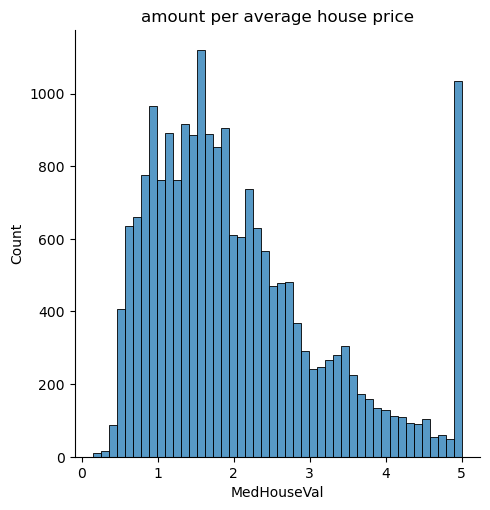

In [119]:
fig=sns.displot(y,palette='pastel') 
plt.title('amount per average house price')  
plt.show() 

### showing heat map of correlation matrix 

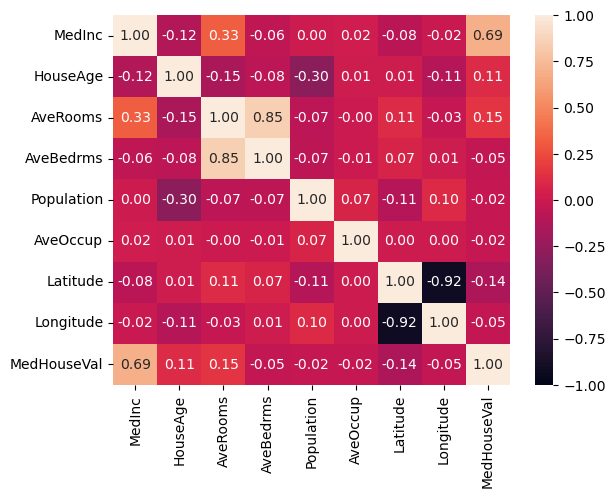

In [120]:
sns.heatmap(data=df.corr(),annot=True, fmt=".2f",mask=None,vmin=-1.0, vmax=1.0) 
plt.show()

### showing average house price per region

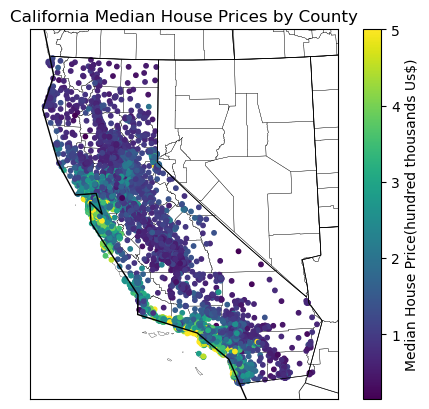

In [121]:
m = Basemap(
    projection='lcc',
    resolution='c',
    lat_0=37.5, lon_0=-119,
    width=1E6, height=1.2E6
)

# Draw county boundaries
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawcounties(linewidth=0.2) 
#m.drawcounties(facecolor=df['MedHouseVal']) 

# Scatter plot median house prices on the map
# Replace 'lat' and 'lon' with your latitude and longitude columns
m.scatter(df['Longitude'], df['Latitude'], latlon=True, c=df['MedHouseVal'], cmap='viridis', marker='o', s=10)

# Add colorbar
plt.colorbar(label='Median House Price(hundred thousands Us$)')

# Add title
plt.title('California Median House Prices by County')

# Show the map
plt.show()

#### interactive

### reducing dimensions to see scatterplot with tsne

In [122]:
from sklearn.manifold import TSNE
df_tsne_sample=df.sample(frac=0.2) 
X_tsne_sample=df_tsne_sample.drop(columns=['MedHouseVal']) 
y_tsne_sample=df_tsne_sample['MedHouseVal']
tsne=TSNE(n_components=1,random_state=200)  #we apply the random state so that its not different everytime we restar 
array_red=tsne.fit_transform(X_tsne_sample) #applying dimensional reductioon on array  
df_tsne=pd.DataFrame(array_red,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_tsne = df_tsne.reset_index(drop=True)
y_tsne_sample = y_tsne_sample.reset_index(drop=True)
df_tsne

,COMP1
0,-124.559692
1,4.426967
2,131.696411
3,49.692692
4,-47.158085
...,...
4123,-55.415512
4124,8.723030
4125,130.280716
4126,-27.440226


In [123]:
df_tsne['target']=y_tsne_sample
df_tsne

,COMP1,target
0,-124.559692,0.917
1,4.426967,0.723
2,131.696411,2.670
3,49.692692,2.029
4,-47.158085,1.805
...,...,...
4123,-55.415512,1.643
4124,8.723030,1.210
4125,130.280716,3.083
4126,-27.440226,0.856


In [124]:
array_red

array([[-124.55969 ],
       [   4.426967],
       [ 131.69641 ],
       ...,
       [ 130.28072 ],
       [ -27.440226],
       [-113.19629 ]], dtype=float32)

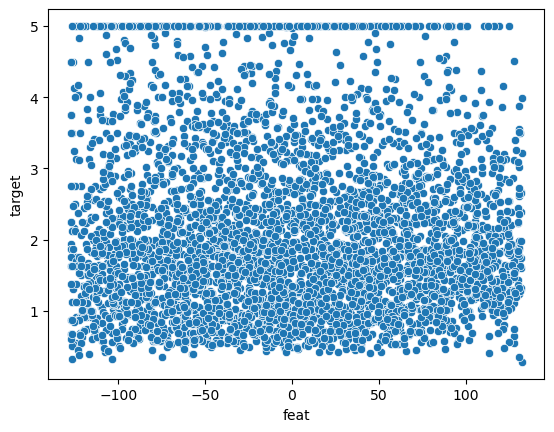

In [125]:
sns.scatterplot(data=df_tsne,x='COMP1',y='target') 
plt.xlabel("feat") 
plt.ylabel("target") 
plt.show() 

### using dimensiality reduction with PCA

In [126]:
from sklearn.decomposition import PCA   
df_pca_sample=df.sample(frac=0.2) 
X_pca_sample=df_pca_sample.drop(columns=['MedHouseVal']) 
y_pca_sample=df_pca_sample['MedHouseVal']
pca=PCA(n_components=1) 
arrayFeat=pca.fit_transform(X_pca_sample) 
df_pca=pd.DataFrame(arrayFeat,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_pca = df_pca.reset_index(drop=True)
y_pca_sample = y_pca_sample.reset_index(drop=True)
df_pca 

,COMP1
0,-296.539623
1,-400.479224
2,-139.438329
3,-116.506062
4,-230.547844
...,...
4123,4694.507487
4124,-779.418408
4125,2402.474619
4126,1666.466191


In [127]:
df_pca['target']=y_pca_sample 
df_pca

,COMP1,target
0,-296.539623,1.54900
1,-400.479224,5.00001
2,-139.438329,0.55800
3,-116.506062,1.05100
4,-230.547844,0.95900
...,...,...
4123,4694.507487,2.95300
4124,-779.418408,2.18500
4125,2402.474619,2.03700
4126,1666.466191,3.43600


<Axes: xlabel='COMP1', ylabel='target'>

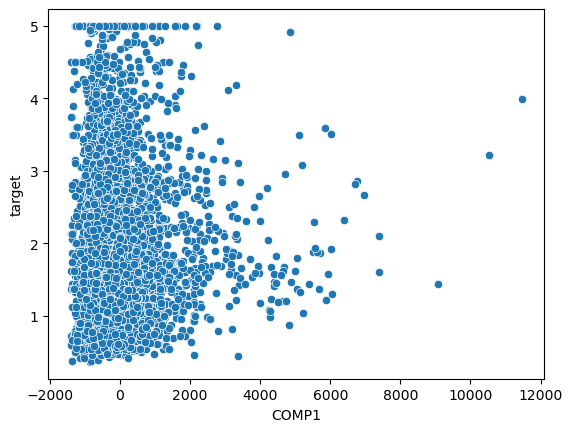

In [128]:
sns.scatterplot(data=df_pca,x='COMP1',y='target')

## SPLITTING DATA

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [130]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10851,3.1667,22.0,3.803838,1.000000,1952.0,2.081023,33.66,-117.90
19419,3.8864,42.0,6.226481,1.031359,921.0,3.209059,37.61,-121.09
7761,4.8750,40.0,5.181818,1.010101,399.0,4.030303,33.91,-118.10
6230,3.6648,34.0,4.297539,0.944072,1230.0,2.751678,34.06,-117.94
19295,3.7991,21.0,4.907407,1.006173,414.0,2.555556,38.37,-122.78
...,...,...,...,...,...,...,...,...
11971,2.7600,26.0,5.520871,1.085299,1720.0,3.121597,34.01,-117.45
3041,2.2321,36.0,5.865672,1.447761,573.0,4.276119,35.52,-119.28
11302,3.4837,35.0,4.672316,0.912429,1065.0,3.008475,33.78,-117.92
18054,7.9135,21.0,7.928571,1.111429,856.0,2.445714,37.25,-121.97


In [131]:
y_train

10851    1.610
19419    1.714
7761     1.676
6230     1.939
19295    1.750
         ...  
11971    0.952
3041     0.375
11302    1.865
18054    4.964
7099     2.572
Name: MedHouseVal, Length: 16512, dtype: float64

In [132]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20027,3.0234,15.0,5.319048,0.988095,1254.0,2.985714,36.09,-119.02
18894,4.0938,37.0,5.979592,1.046382,1325.0,2.458256,38.13,-122.24
17351,3.5288,8.0,5.733456,1.139706,1159.0,2.130515,34.88,-120.41
3913,3.5313,31.0,4.730120,1.012048,1494.0,3.600000,34.20,-118.55
13927,2.1908,46.0,5.523985,1.140221,787.0,2.904059,34.83,-114.60
...,...,...,...,...,...,...,...,...
14077,2.1856,41.0,3.718987,1.065823,803.0,2.032911,32.76,-117.12
3892,3.8247,33.0,4.827160,1.034568,2097.0,2.588889,34.21,-118.55
15404,4.0776,13.0,6.117264,1.055375,1767.0,2.877850,33.23,-117.24
12844,3.3074,34.0,5.715789,0.984211,663.0,3.489474,38.68,-121.37


In [133]:
y_test

20027    0.88600
18894    1.26900
17351    1.65500
3913     2.11800
13927    0.48100
          ...   
14077    1.20500
3892     2.08700
15404    1.96000
12844    0.84200
18292    5.00001
Name: MedHouseVal, Length: 4128, dtype: float64

## CREATING MODEL 

In [134]:
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor


In [135]:
# model=DecisionTreeRegressor() 

In [212]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split 
from sklearn.datasets import load_diabetes 
from sklearn.decomposition import PCA  
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import RadiusNeighborsRegressor 
from sklearn.cross_decomposition import PLSCanonical,PLSRegression
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor 
def getModels(): 
   return {"LINEAR REGRESSION":LinearRegression(), 
    "RANDOM FOREST":RandomForestRegressor(max_depth=9,min_samples_leaf=4,min_samples_split=8,n_estimators=200),
    "ADA BOOST":AdaBoostRegressor(learning_rate= 0.1, loss= 'exponential', n_estimators= 50), 
    "DECISION TREE":DecisionTreeRegressor(), 
    "SGD":make_pipeline(StandardScaler(),SGDRegressor(alpha= 0.01,eta0= 0.1,learning_rate= 'optimal',loss= 'epsilon_insensitive',max_iter= 100,penalty= 'l1',tol= 0.01)), 
    "KNN":KNeighborsRegressor(algorithm= 'ball_tree', leaf_size= 30, n_neighbors= 10, p= 1, weights= 'distance'),
    "EXTRA TREES":ExtraTreesRegressor(random_state=0,max_depth=6),
    "GRADIENT BOOST":GradientBoostingRegressor(random_state=0) , 
    "XGREGRESSOR":XGBRegressor(max_depth=6)}

## TRAINING MODEL

In [213]:
# model.fit(X_train,y_train)

In [214]:
models=getModels() 
for i in models.keys(): 
    models[i].fit(X_train,y_train)

""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 

print('models loaded') 
models

models loaded


{'LINEAR REGRESSION': LinearRegression(),
 'RANDOM FOREST': RandomForestRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=200),
 'ADA BOOST': AdaBoostRegressor(learning_rate=0.1, loss='exponential'),
 'DECISION TREE': DecisionTreeRegressor(),
 'SGD': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdregressor',
                  SGDRegressor(alpha=0.01, eta0=0.1, learning_rate='optimal',
                               loss='epsilon_insensitive', max_iter=100,
                               penalty='l1', tol=0.01))]),
 'KNN': KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, p=1,
                     weights='distance'),
 'EXTRA TREES': ExtraTreesRegressor(max_depth=6, random_state=0),
 'GRADIENT BOOST': GradientBoostingRegressor(random_state=0),
 'XGREGRESSOR': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsampl

## PREDICTING

In [215]:
scores={} 
predictions={} 
rmse={}  
mse={} 
metrics={}
from sklearn.metrics import mean_squared_error 
for i in models.keys():  
    predictions[i]=models[i].predict(X_test) 
    rmse[i]=mean_squared_error(y_test,predictions[i],squared=True)  
    mse[i]=mean_squared_error(y_test,predictions[i],squared=False) 
    metrics[i]={'MSE':mse[i],'RMSE':rmse[i]}
    scores[i]=rmse[i]


""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 


metrics 

{'LINEAR REGRESSION': {'MSE': 0.7230193716316698, 'RMSE': 0.5227570117546547},
 'RANDOM FOREST': {'MSE': 0.5516704455438913, 'RMSE': 0.30434028048659556},
 'ADA BOOST': {'MSE': 0.7446815570417377, 'RMSE': 0.5545506213981067},
 'DECISION TREE': {'MSE': 0.7013013590295168, 'RMSE': 0.4918235961766473},
 'SGD': {'MSE': 0.7418731285145138, 'RMSE': 0.5503757388119124},
 'KNN': {'MSE': 0.9957331481117696, 'RMSE': 0.9914845022485752},
 'EXTRA TREES': {'MSE': 0.7448467463297357, 'RMSE': 0.5547966755179936},
 'GRADIENT BOOST': {'MSE': 0.5279268242812677, 'RMSE': 0.2787067317957045},
 'XGREGRESSOR': {'MSE': 0.46047951831346734, 'RMSE': 0.21204138678620288}}

### getting best parameter for models

#### random forest

In [216]:
# uncomment if you want to find the best parameters for random forest(takes a long long time)
# param_grid = {
#     'n_estimators': [50, 100,200],
#     'max_depth': [5,6,8,9],
#     'min_samples_split': [4,5,8,10],s
#     'min_samples_leaf': [2, 4,6]
# }
# rf = RandomForestRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('grid_search_results.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### adaboost

In [217]:
# uncomment if you wanna know the best params for adaboost
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0],  
#     'loss':['linear', 'square', 'exponential']
# }
# adaboost = AdaBoostRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('./parameters/adaboost-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### KNN 

In [218]:
# uncomment if you wanna know the best params for knn
# param_grid = {
#     'n_neighbors': [3, 5, 7, 10],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2], 
#     'algorithm':['ball_tree', 'kd_tree', 'brute'], 
#     'leaf_size':[30,15,7,40,60,5]
# }
# knn = KNeighborsRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('./parameters/knn-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### SGD

In [219]:
# uncomment if you wanna know the best params for sgd
# param_grid = {
#     'sgdregressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
#     'sgdregressor__penalty': ['l1', 'l2', 'elasticnet'],
#     'sgdregressor__alpha': [0.0001, 0.001, 0.01],
#     'sgdregressor__learning_rate': ['constant', 'optimal', 'invscaling'],
#     'sgdregressor__eta0': [0.01, 0.1, 0.5],
#     'sgdregressor__tol': [1e-4, 1e-3, 1e-2],
#     'sgdregressor__max_iter': [100, 500, 1000]  
# }
# pipe = make_pipeline(StandardScaler(), SGDRegressor())

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started saving models')
# with open('./parameters/svg-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

### comparing each model

In [220]:
# plt.scatter(y_test, y_pred,edgecolor='black')
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.title("True Values vs Predictions in Regression")
# plt.show()

['LINEAR REGRESSION', 'RANDOM FOREST', 'ADA BOOST', 'DECISION TREE', 'SGD', 'KNN', 'EXTRA TREES', 'GRADIENT BOOST', 'XGREGRESSOR']
9


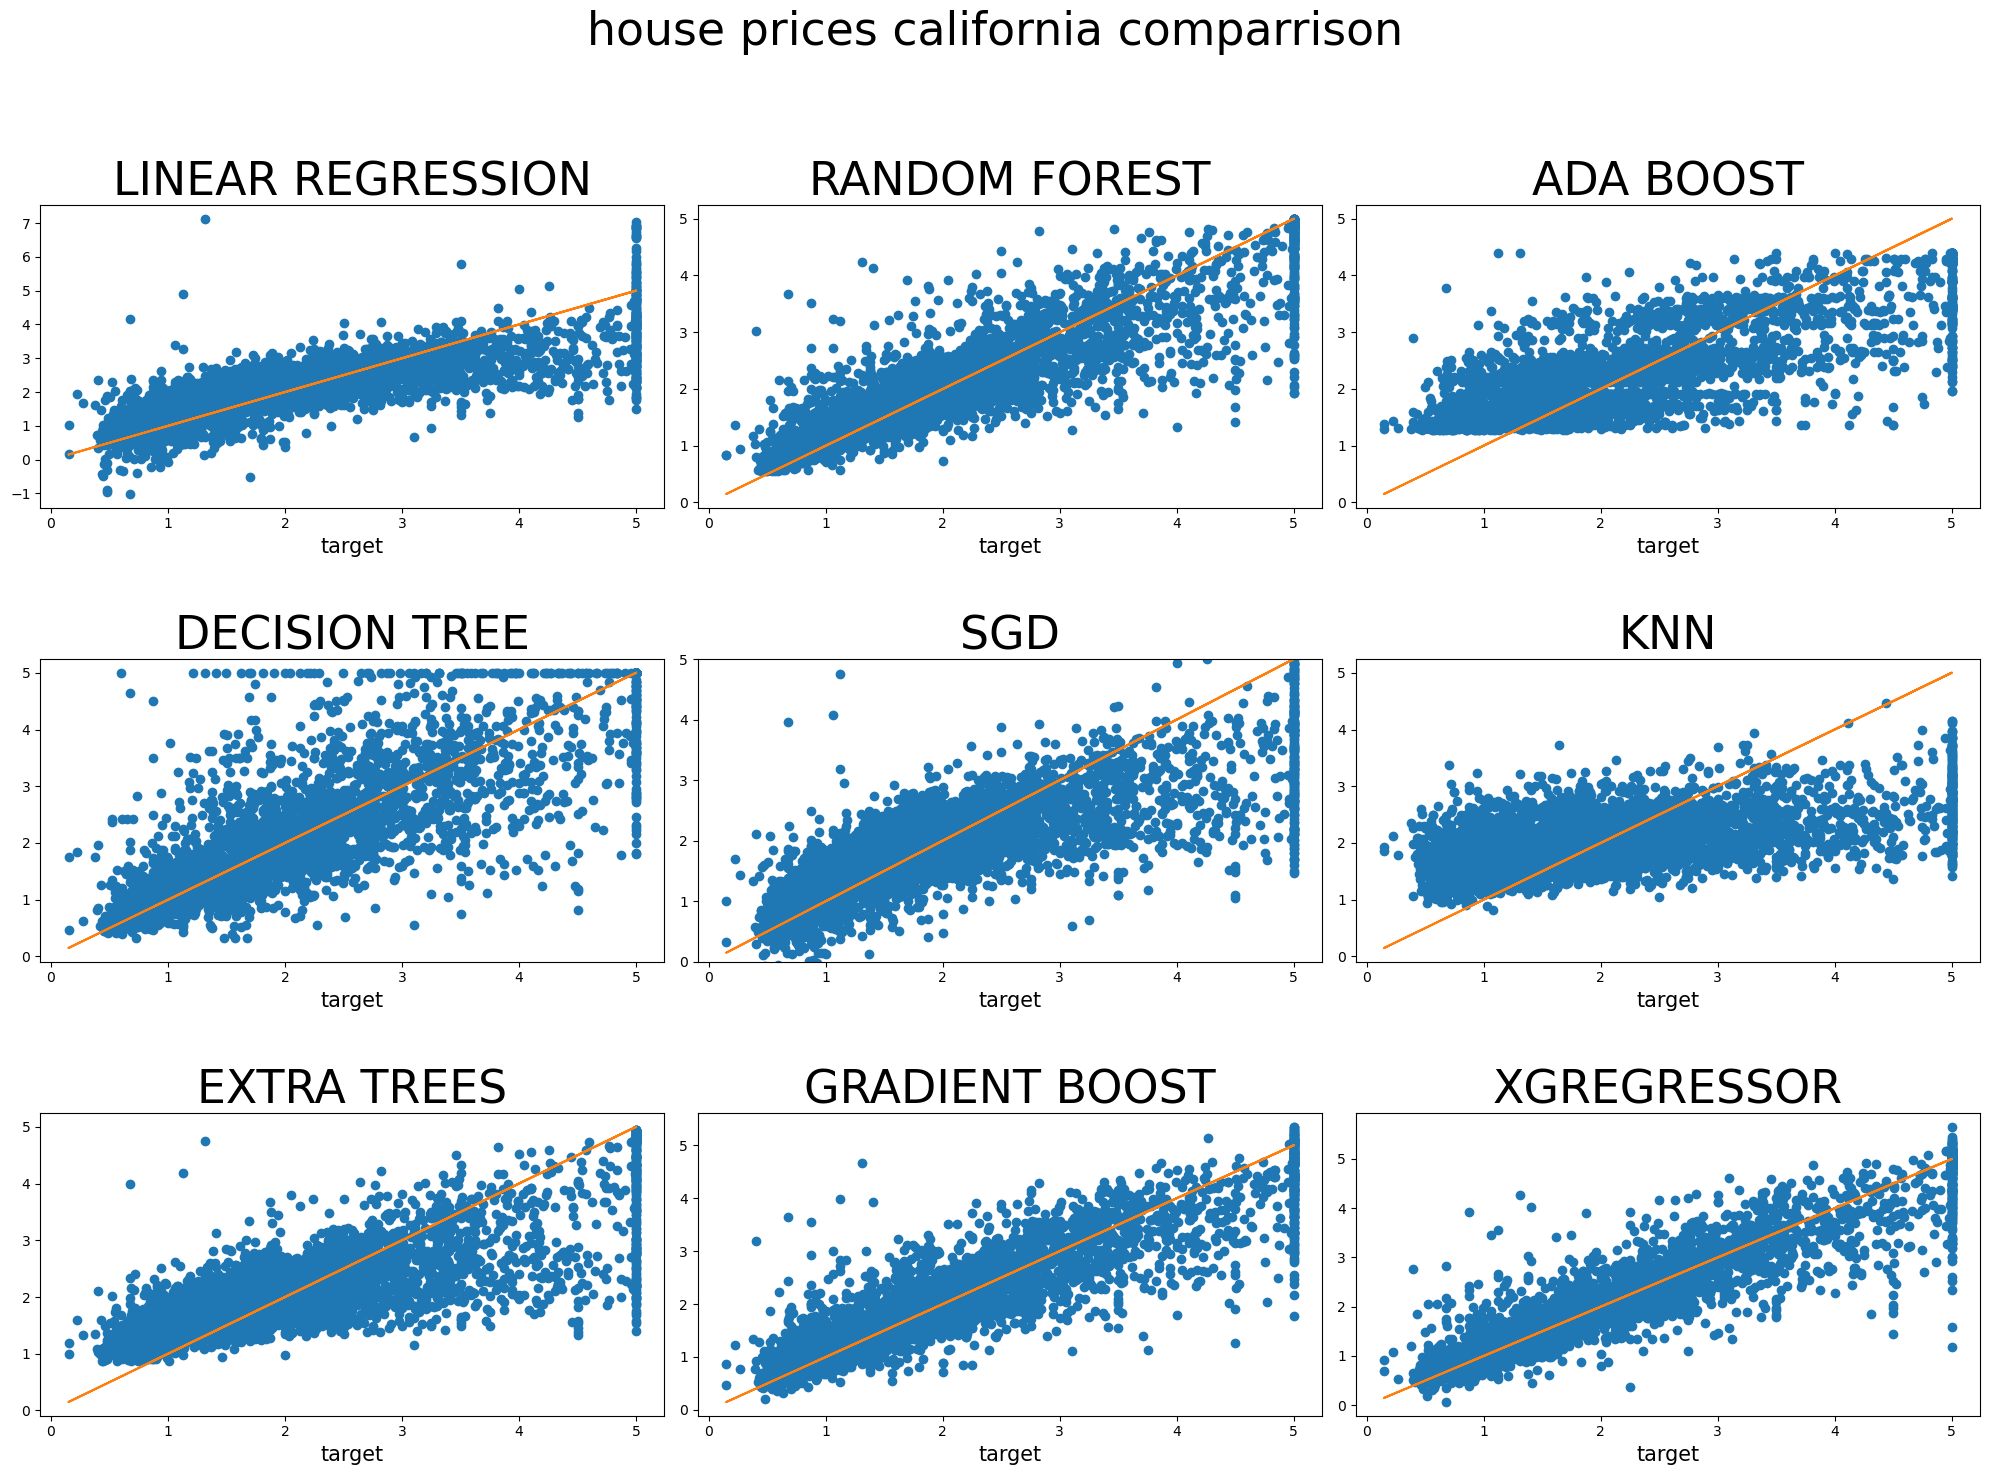

In [228]:
auxdic=scores
auxdic=list(auxdic.items())

fig,ax =plt.subplots(3,3) 
fig.suptitle("house prices california comparrison",size=33)   
fig.set_figwidth(20)
fig.set_figheight(15)
dimX=ax.shape[0] 
dimY=ax.shape[1] 
predictionsList= []
for i in predictions.keys():
    predictionsList.append(predictions[i]) 
predictionsList=np.transpose(predictionsList) 
predictionsList=pd.DataFrame(predictionsList,columns=models.keys())  

#print(predictions)
#predictions=np.transpose(pd.DataFrame(predictions)) 
m_keys=list(models.keys()) 
print(m_keys) 
print(len(m_keys))
for i in range(dimX): 
    for j in range(dimY) : 
        oneDIndex=(i*dimX)+j  
        ax[i,j].plot(y_test,predictions[m_keys[oneDIndex]],"o")  
        ax[i,j].set_title(m_keys[oneDIndex],size=33) 
        ax[i,j].set_xlabel("target",size=15) 
        ax[i,j].set_xbound(lower=0,upper=10)
        if m_keys[oneDIndex] == 'SGD': 
            ax[i,j].set_ybound(lower=0,upper=12) 
            ax[i,j].set_ylim(0,5) 
        m,b=np.polyfit(y_test,y_test,deg=1)
        ax[i,j].plot(y_test,m*y_test+b)
        # centerish=ax[i,j].get_xbound()[1]/2
        # centerishY=ax[i,j].get_ybound()[1]/2
        # ax[i,j].text(x=centerish-13,y=-centerishY/2.5,s=("R2:%f" % float(auxdic[oneDIndex][1])),ma="center")
fig.align_labels() 
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.5)

In [222]:
# residuals = y_test - y_pred
# plt.hist(residuals, bins=50)
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.title("Distribution of Residuals in Regression")
# plt.show()

In [223]:
# plt.plot(y_test, label='True Values')
# plt.plot(y_pred, label='Predictions')
# plt.xlabel("Sample Index")
# plt.ylabel("Values")
# plt.title("True Values vs Predictions Across Samples")
# plt.legend()
# plt.show()